# 4. Model Eğitimi - Sınıflandırma

Bu notebook'ta kardiyovasküler hastalık tahmini için çeşitli sınıflandırma modelleri oluşturacak ve eğiteceğiz:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting (XGBoost)
5. Support Vector Machine (SVM)

Her model için eğitim/test ayrımı yapacak ve performansları karşılaştıracağız.

## 4.1. Kütüphanelerin İmport Edilmesi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# Sklearn kütüphaneleri
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Modeller
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


print("Kütüphaneler yüklendi!")

Kütüphaneler yüklendi!


## 4.2. Veri Setinin Yüklenmesi ve Hazırlanması

In [4]:
# Veri setini yükle
df = pd.read_csv('../data/cardio_cleaned.csv')

# Özellik / hedef ayrımı
X = df.drop(columns=['bmi', 'age'])
y = df['cardio']

## 4.3. Eğitim ve Test Setlerine Ayırma

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# X ve y (daha önce ayırmıştık)
X = df.drop(columns=['cardio'])
y = df['cardio']

# Train - Test ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## 4.4. Veri Ölçeklendirme

In [16]:
# Özellik ölçekleme
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 4.5. Model 1: Logistic Regression

In [18]:
# Lojistik Regresyon Modeli
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Tahminler
y_pred_lr = log_reg.predict(X_test_scaled)
y_pred_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# Metrikler
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_lr = roc_auc_score(y_test, y_pred_proba_lr)

print("LOGISTIC REGRESSION PERFORMANSI")
print("-"*40)
print(f"Accuracy : {acc_lr:.4f}")
print(f"Precision: {prec_lr:.4f}")
print(f"Recall   : {rec_lr:.4f}")
print(f"F1-Score : {f1_lr:.4f}")
print(f"ROC-AUC  : {roc_lr:.4f}")


LOGISTIC REGRESSION PERFORMANSI
----------------------------------------
Accuracy : 0.7305
Precision: 0.7558
Recall   : 0.6722
F1-Score : 0.7116
ROC-AUC  : 0.7923


## 4.6. Model 2: Decision Tree

In [22]:
# Decision Tree Modeli
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

print("DECISION TREE PERFORMANSI")
print("-"*40)
print(f"Accuracy : {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score : {f1_score(y_test, y_pred_dt):.4f}")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_pred_proba_dt):.4f}")

DECISION TREE PERFORMANSI
----------------------------------------
Accuracy : 0.7233
Precision: 0.7319
Recall   : 0.6950
F1-Score : 0.7129
ROC-AUC  : 0.7791


## 4.7. Model 3: Random Forest

In [21]:
# Random Forest Modeli
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("RANDOM FOREST PERFORMANSI")
print("-"*40)
print(f"Accuracy : {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score : {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

RANDOM FOREST PERFORMANSI
----------------------------------------
Accuracy : 0.7118
Precision: 0.7153
Recall   : 0.6927
F1-Score : 0.7039
ROC-AUC  : 0.7723


## 4.8. Model 4: Gradient Boosting

In [23]:
# Gradient Boosting Modeli
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    random_state=42
)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

print("GRADIENT BOOSTING PERFORMANSI")
print("-"*40)
print(f"Accuracy : {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gb):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_gb):.4f}")
print(f"F1-Score : {f1_score(y_test, y_pred_gb):.4f}")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_pred_proba_gb):.4f}")


GRADIENT BOOSTING PERFORMANSI
----------------------------------------
Accuracy : 0.7335
Precision: 0.7510
Recall   : 0.6896
F1-Score : 0.7190
ROC-AUC  : 0.8005


## 4.9. Model 5: SUPPORT VECTOR MACHINE (SVM)

In [24]:
# SVM Modeli
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

svm_model = SVC(
    kernel='rbf',
    probability=True,
    random_state=42
)

svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

print("SVM PERFORMANSI")
print("-"*40)
print(f"Accuracy : {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-Score : {f1_score(y_test, y_pred_svm):.4f}")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_pred_proba_svm):.4f}")


SVM PERFORMANSI
----------------------------------------
Accuracy : 0.7337
Precision: 0.7591
Recall   : 0.6758
F1-Score : 0.7150
ROC-AUC  : 0.7896


## 4.10. Model 6: K-NEAREST NEIGHBORS (KNN)

In [25]:
# KNN Modeli
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

print("KNN PERFORMANSI")
print("-"*40)
print(f"Accuracy : {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score : {f1_score(y_test, y_pred_knn):.4f}")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_pred_proba_knn):.4f}")


KNN PERFORMANSI
----------------------------------------
Accuracy : 0.6946
Precision: 0.6996
Recall   : 0.6700
F1-Score : 0.6845
ROC-AUC  : 0.7394


## 4.11. Model 7: NAIVE BAYES (GaussianNB)

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred_nb = nb_model.predict(X_test_scaled)
y_pred_proba_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

print("NAIVE BAYES PERFORMANSI")
print("-"*40)
print(f"Accuracy : {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_nb):.4f}")
print(f"F1-Score : {f1_score(y_test, y_pred_nb):.4f}")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_pred_proba_nb):.4f}")

NAIVE BAYES PERFORMANSI
----------------------------------------
Accuracy : 0.7160
Precision: 0.7594
Recall   : 0.6231
F1-Score : 0.6845
ROC-AUC  : 0.7804


## 4.12. Model Karşılaştırma

In [28]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest',
        'Gradient Boosting',
        'SVM',
        'KNN',
        'Naive Bayes'
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_nb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_gb),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_nb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_gb),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_nb)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_gb),
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_nb)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_lr),
        roc_auc_score(y_test, y_pred_proba_dt),
        roc_auc_score(y_test, y_pred_proba_rf),
        roc_auc_score(y_test, y_pred_proba_gb),
        roc_auc_score(y_test, y_pred_proba_svm),
        roc_auc_score(y_test, y_pred_proba_knn),
        roc_auc_score(y_test, y_pred_proba_nb)
    ]
})

print("="*80)
print("MODEL KARŞILAŞTIRMA TABLOSU")
print("="*80)
print(results.to_string(index=False))


MODEL KARŞILAŞTIRMA TABLOSU
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.730536   0.755766 0.672226  0.711552 0.792275
      Decision Tree  0.723313   0.731893 0.694953  0.712945 0.779073
      Random Forest  0.711784   0.715331 0.692739  0.703854 0.772312
  Gradient Boosting  0.733528   0.751045 0.689640  0.719034 0.800490
                SVM  0.733674   0.759118 0.675767  0.715022 0.789612
                KNN  0.694637   0.699646 0.670012  0.684508 0.739418
        Naive Bayes  0.716016   0.759353 0.623081  0.684501 0.780381


In [38]:
results.to_csv('../results/model_karsilastirmasi.csv', index=False)
print("Model karşılaştırma tablosu kaydedildi: model_karsilastirmasi.csv")

Model karşılaştırma tablosu kaydedildi: model_karsilastirmasi.csv


## 4.13. Model Karşılaştırma Görselleştirme

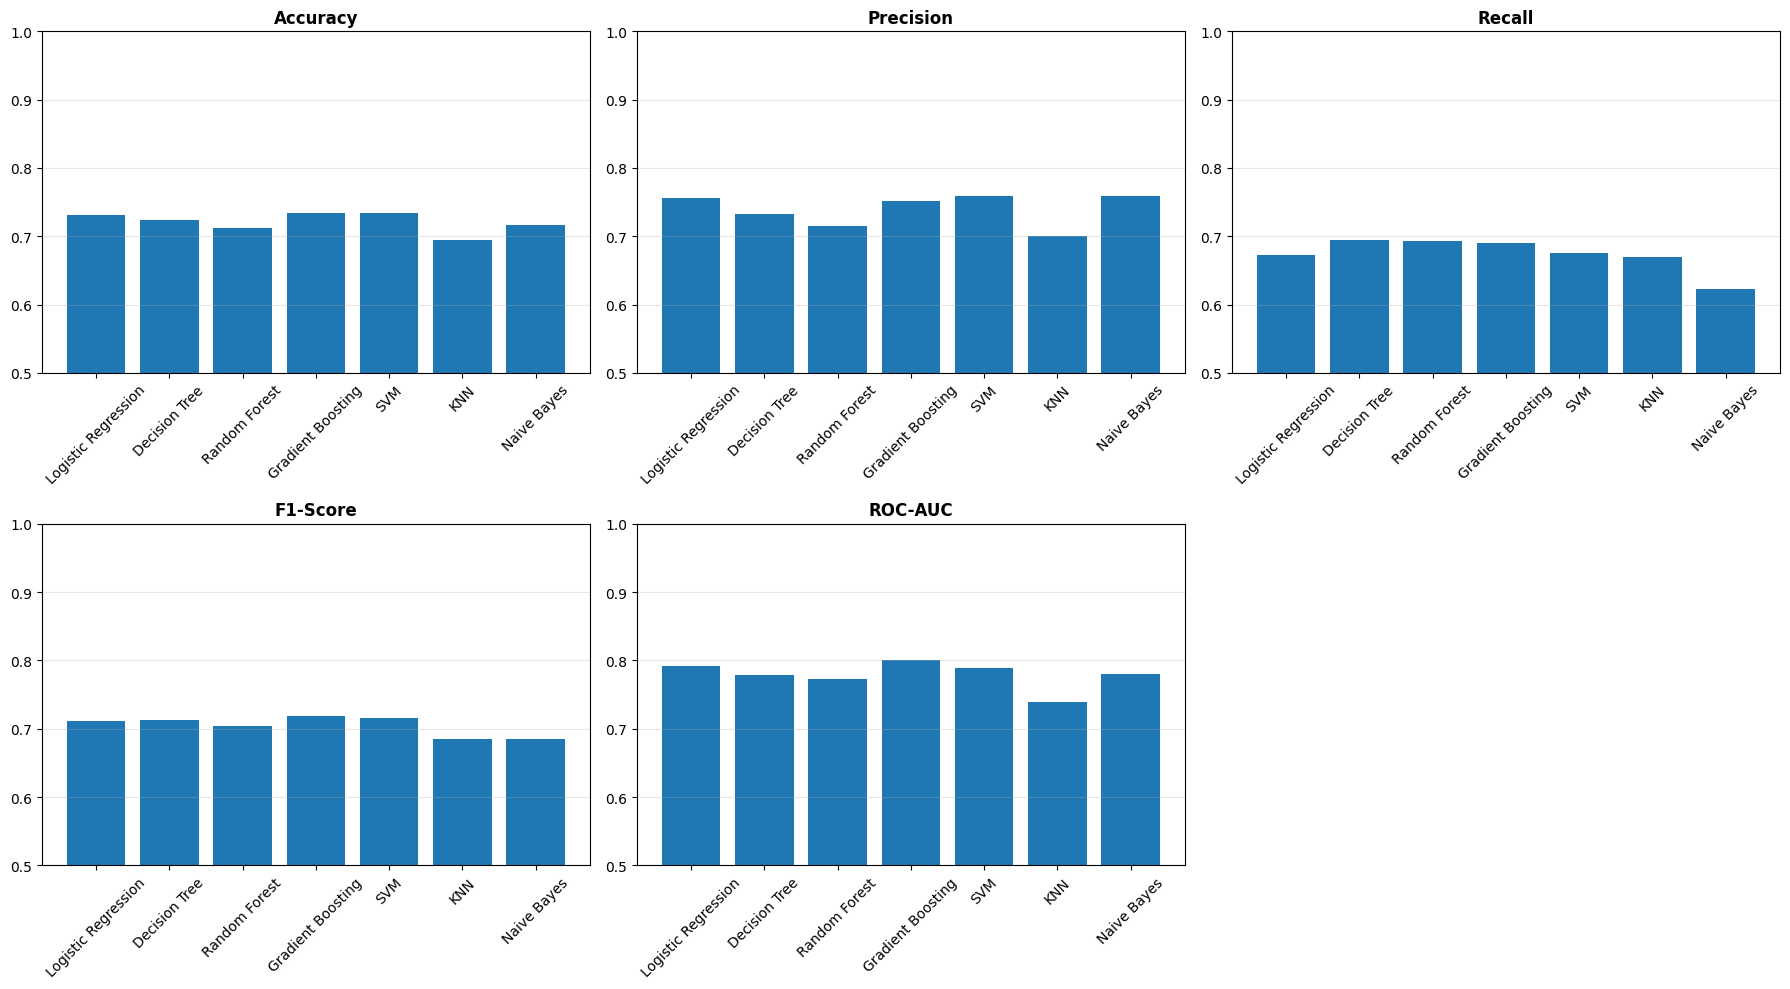

In [29]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, metric in enumerate(metrics):
    axes[i].bar(results['Model'], results[metric])
    axes[i].set_title(metric, fontweight='bold')
    axes[i].set_ylim(0.5, 1.0)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', alpha=0.3)

# Son boş ekseni kaldır
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [40]:
plt.savefig('../results/figures/model_karsilastirmasi.png', dpi=300, bbox_inches='tight')
print("Grafik kaydedildi: model_karsilastirmasi.png")

Grafik kaydedildi: model_karsilastirmasi.png


<Figure size 640x480 with 0 Axes>

4.14. En İyi Modeli Seç ve Kaydet

In [34]:
import pickle

# En iyi modeli F1-Score'a göre seç
best_model_idx = results['F1-Score'].idxmax()
best_model_name = results.loc[best_model_idx, 'Model']

print(f"En iyi model: {best_model_name}")

model_dict = {
    'Logistic Regression': log_reg,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'SVM': svm_model,
    'KNN': knn_model,
    'Naive Bayes': nb_model
}

best_model = model_dict[best_model_name]

# Modeli kaydet
with open('../models/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Scaler gerekiyorsa onu da kaydet
with open('../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model kaydedildi:")


En iyi model: Gradient Boosting
Model kaydedildi:
